## Importing the Necessary Package

In [1]:
import pandas as pd
import numpy as np
import json
import os
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
#nltk.download('omw-1.4')
import nltk
from nltk.corpus import stopwords
import re
from string import punctuation
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
import ast
# import pyspark
# from pyspark.sql import SparkSession
from graphdatascience import GraphDataScience
#from pyspark.sql import SaveMode

%matplotlib inline
pd.set_option('display.max_colwidth', 300)


C:\Users\derek\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Reading the datasets --FYI change the paths

In [2]:
#data=pd.read_excel(r"C:\Users\derek\OneDrive\Documents\Main_data.xlsx")
data=pd.read_csv(r"C:\Users\derek\Downloads\finelib_description_categories.csv",encoding="ISO-8859-1")  #From Elena

data.shape[0]

44935

## Data Exploration

Text(0, 0.5, 'Percentage from total dist., %')

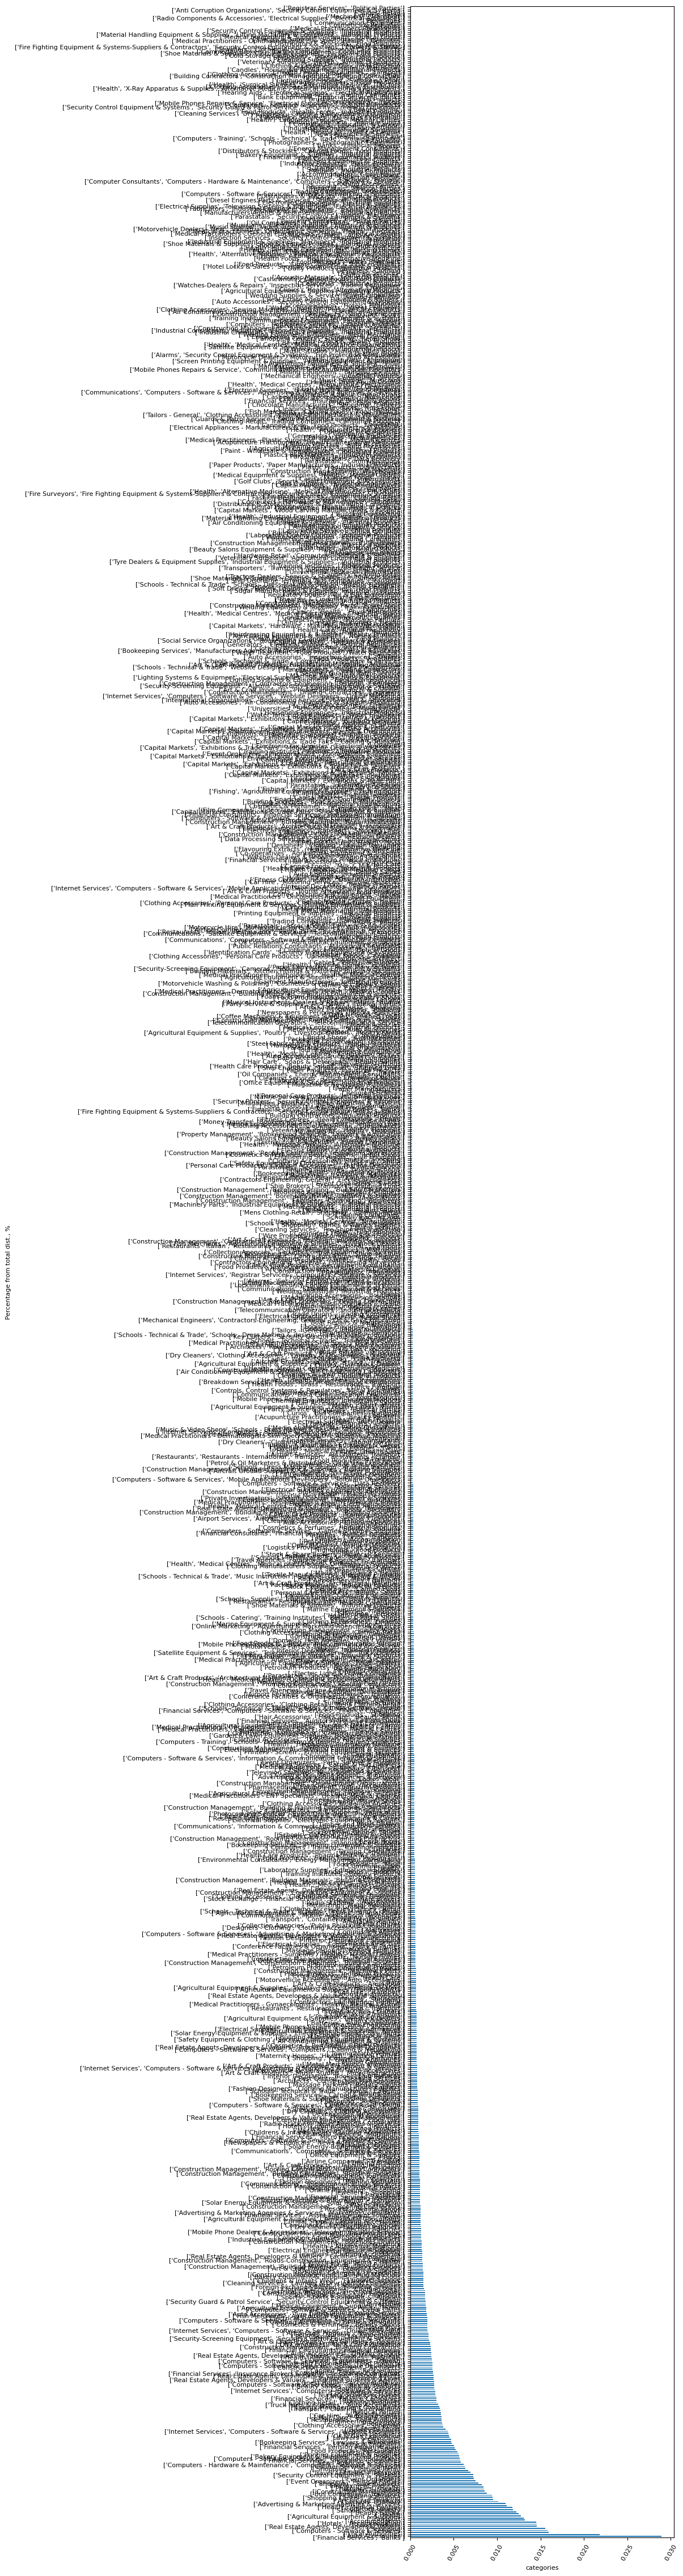

In [3]:
data.categories.value_counts(normalize = True).plot(kind = 'barh', figsize = (6, 58), fontsize = 8)
plt.xticks(rotation = 60)
plt.xlabel("categories", fontsize = 8)
plt.ylabel("Percentage from total dist., %", fontsize = 8)

In [4]:
data.categories= data.categories.apply(eval)
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
counts=to_1D(data.categories).value_counts()
counts=pd.DataFrame(counts).reset_index()
counts.rename(columns={ counts.columns[1]: "counts" }, inplace = True)
counts

index  counts
0                             Health    3420
1                 Financial Services    2937
2                           Shopping    2791
3                          Transport    2714
4    Computers - Software & Services    2554
..                               ...     ...
625    Anti Corruption Organizations       1
626                          Candles       1
627                          Brushes       1
628   Radio Components & Accessories       1
629                 Cookers & Stoves       1

[630 rows x 2 columns]

In [5]:
to_1D(data.categories)

0             Animal Husbandry
1             Animal Husbandry
2             Animal Husbandry
3             Animal Husbandry
4             Animal Husbandry
                 ...          
73464    Importers & Exporters
73465    Importers & Exporters
73466    Importers & Exporters
73467    Importers & Exporters
73468    Importers & Exporters
Length: 73469, dtype: object

Text(0.5, 1.0, 'categories')

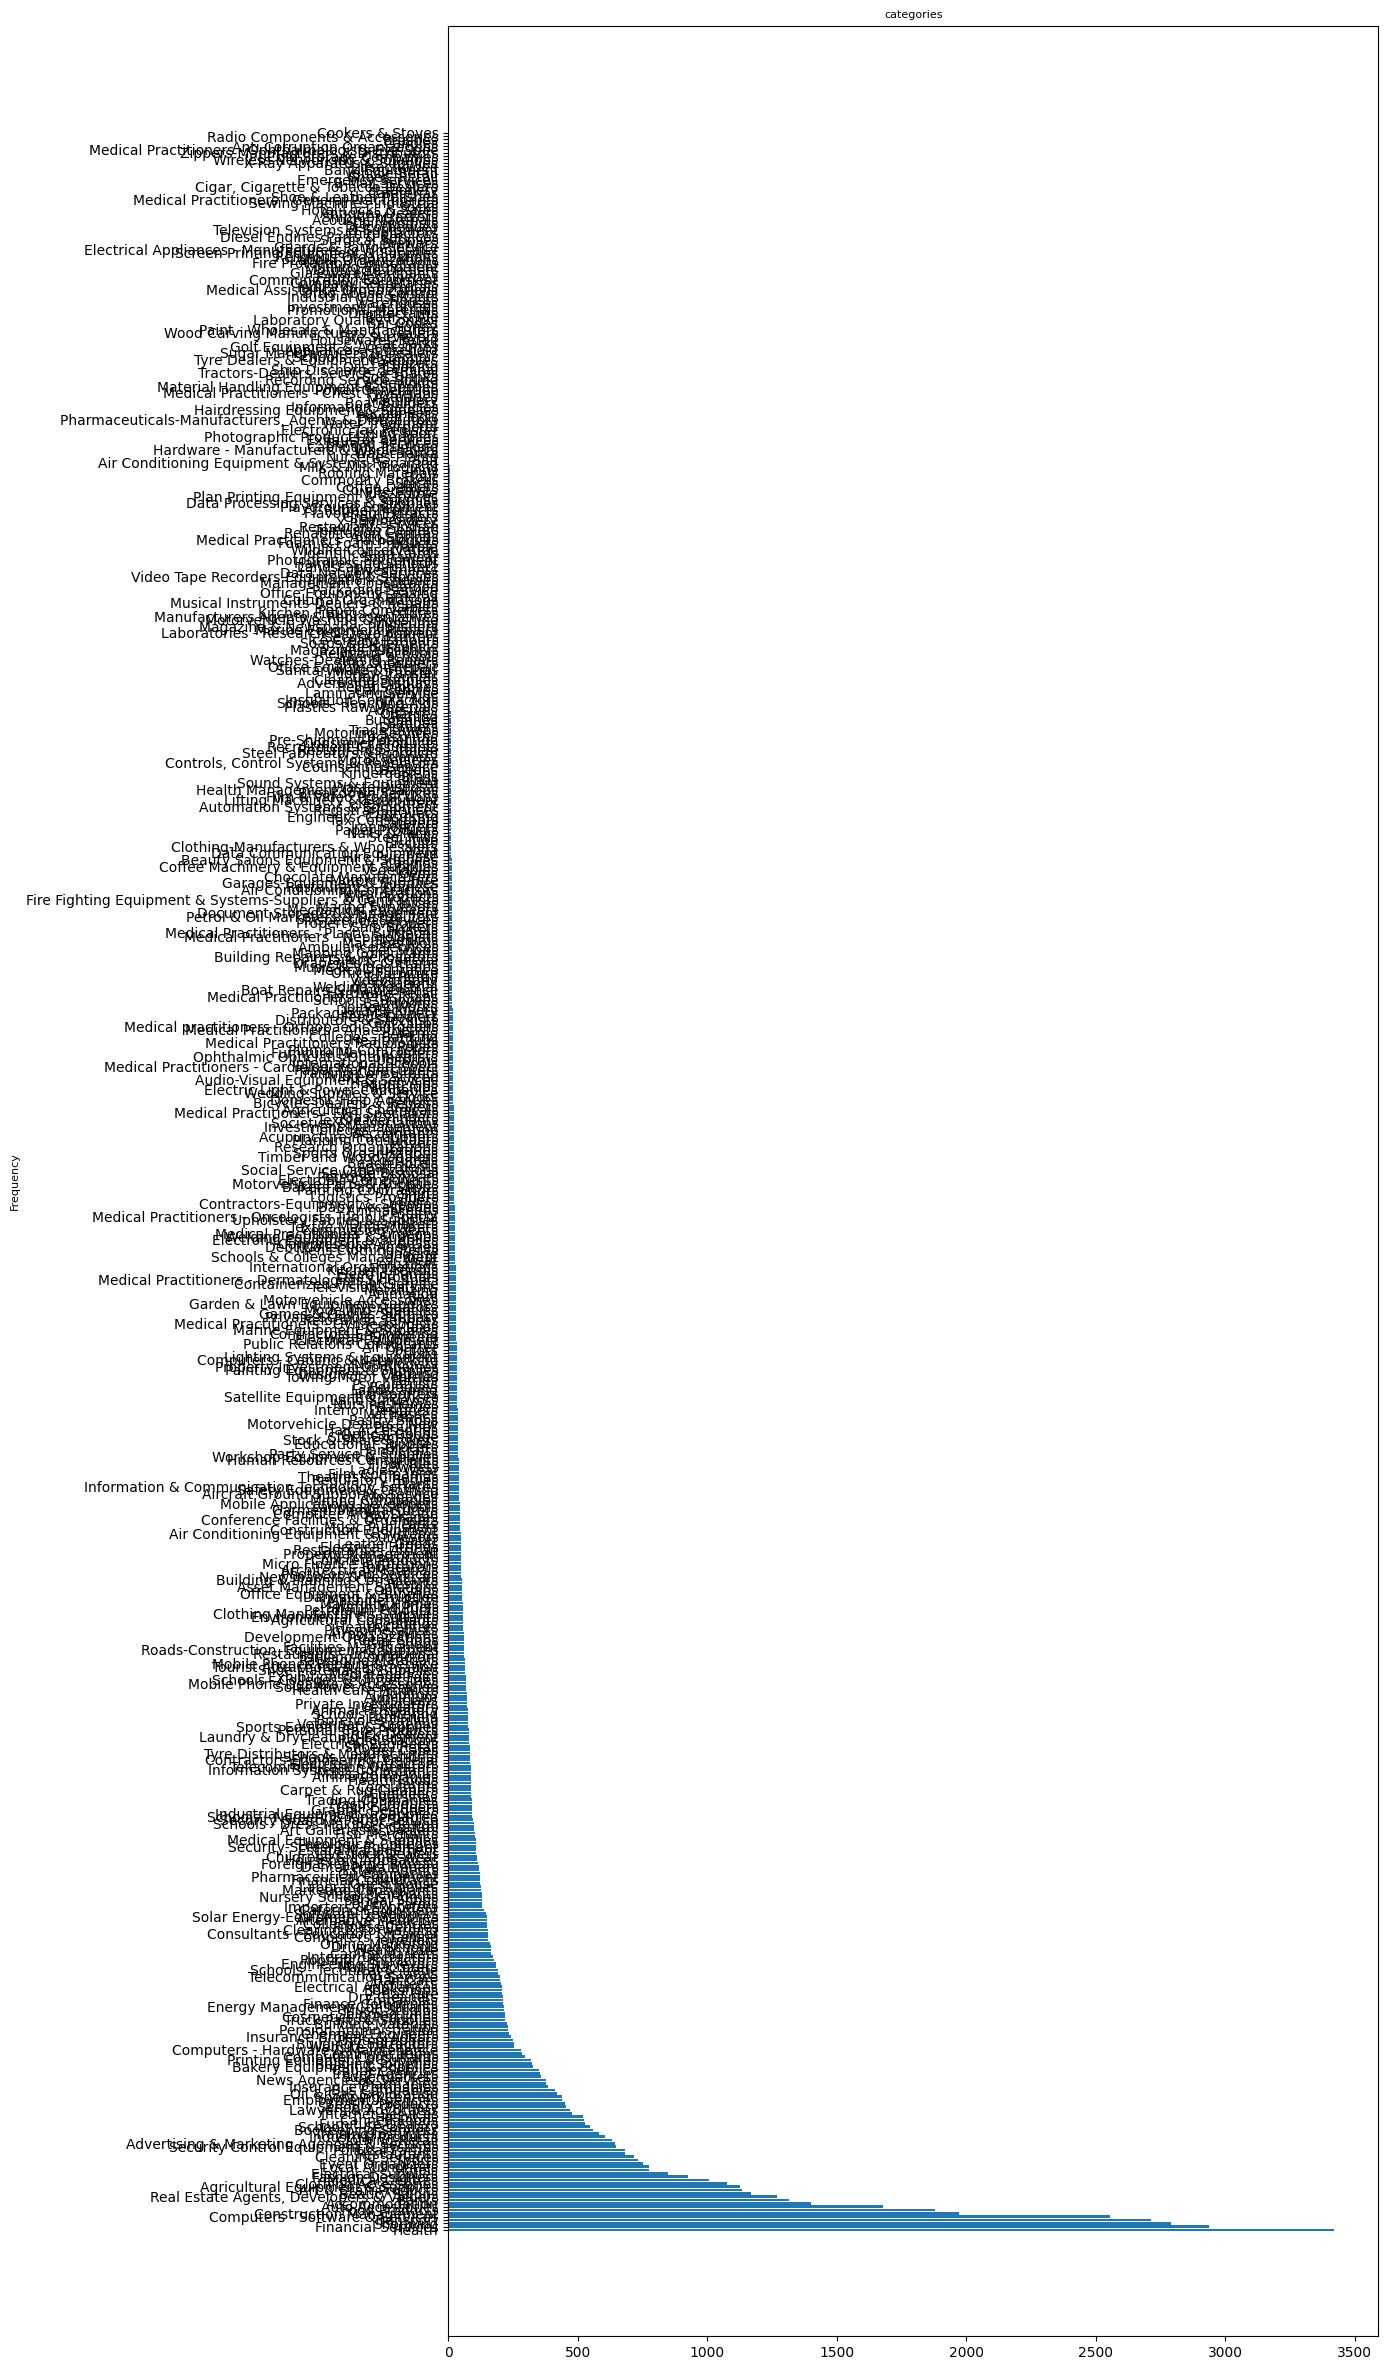

In [6]:
fig, ax = plt.subplots(figsize = (12,30))
ax.barh(to_1D(data.categories).value_counts().index,
        to_1D(data.categories).value_counts().values)
ax.set_ylabel("Frequency", size = 8)
ax.set_title("categories", size = 8)

In [7]:

Less_counts=counts[counts.counts<10]
Less_counts.reset_index()
Less_counts

index  counts
456                       Adhesives       9
457          Plastics Raw Materials       9
458         Schools - Teaching Aids       9
459          Insulation Contractors       9
460                        HIV-Aids       9
..                              ...     ...
625   Anti Corruption Organizations       1
626                         Candles       1
627                         Brushes       1
628  Radio Components & Accessories       1
629                Cookers & Stoves       1

[174 rows x 2 columns]

In [8]:
categories =data.categories
categories_dict = {}
invalid_categories = []
Category_dict = {}
Category_per_company = []
invalid_categories = [None]

def category_mapper():
            category_list = []
            for val in to_1D(data.categories):
                val=val.replace(",","")
                if val not in invalid_categories:
                    category_list.append(val)
                    if val in Category_dict:
                        Category_dict[val] += 1
                    else:
                        Category_dict[val] = 1
                        Category_per_company.append(category_list)
category_mapper()
category_dict = {key:val for key, val in Category_dict.items() if val != 1}
category_dict

{'Animal Husbandry': 75,
 'Boat Repairs & Maintenance': 15,
 'Document Storage & Management': 13,
 'Electric Light & Power Companies': 20,
 'Electrical Appliances': 206,
 'Electrical Equipment': 32,
 'Furniture Manufacturers': 18,
 'Graphic Designers': 92,
 'Hire Purchase': 12,
 'Household Appliances': 112,
 'Human Resources Consultants': 40,
 'Interior Designers': 37,
 'Investments': 7,
 'Landscaping': 36,
 'Lawyers & Advocates': 470,
 'Oil & Gas Exploration': 419,
 'Packaging Machinery': 17,
 'Paper Manufacturers': 19,
 'Pharmaceutical Equipment': 123,
 'Political Parties': 683,
 'Power Generation': 5,
 'Recording Service-Sound': 5,
 'Beauty Products': 453,
 'Shipping Lines': 219,
 'Advertising & Marketing Agencies & Services': 645,
 'Timber and Wood Dealers': 22,
 "Ladies' Wear": 41,
 'Shopping': 2791,
 'Clothing-Retail': 634,
 'Accommodation': 1402,
 'Acoustic Materials': 2,
 'Industrial Products': 604,
 'Actuaries': 5,
 'Collection Agencies': 149,
 'Acupuncture Practitioners': 22,

In [9]:

print(len(category_dict.values())) 

keys = list(category_dict.keys())
values = list(category_dict.values()) 

614


In [10]:
excel_path=r"C:\Users\derek\OneDrive\Documents\Main_data_cleaned_Elena.xlsx"
dddd=data.head(0)
dddd.to_excel(excel_path)


In [11]:
#nltk.download()
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text=str(text)
    #remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.translate(str.maketrans('', '', punctuation))
    text = text.lower().strip()
    text = ' '.join([i if i not in stop and i.isalpha() else '' for i in text.lower().split()])
    text = ' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(text)])
    text = re.sub(r"\s{2,}", " ", text)
    return text
df=data

df['description'] = df['description'].apply(lambda x: clean_text(x))
